# IMPORTING RELEVANT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import os
import re
import nltk
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("C:\\Users\\karti\\OneDrive\\Desktop\\Analytics work\\train_news.csv")

In [4]:
df

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


# HANDLING NULL VALUES

In [5]:
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20794,20794,366,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


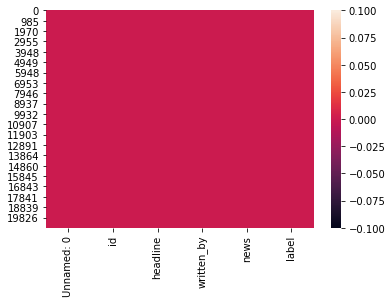

In [8]:
sns.heatmap(df.isnull())

# CHECKING FOR DATASET BALANCE


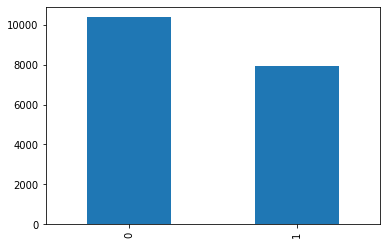

In [9]:
df['label'].value_counts().plot(kind = 'bar')
#Here we can see that the data set is almost equal distributed and balanced to a large extent

In [10]:
df

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20794,20794,366,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [11]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [12]:
df


,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...
20794,366,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [13]:
df.drop('id',axis=1,inplace=True)

In [14]:
df

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...
20794,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0
20796,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


# COMBINING DESCRIPTIVE DATA

In [38]:
#I have created a new column named ‘Combined’ where I have taken all the descriptive data from the columns namely ‘News’,’written_by’, and ‘headline’ and combined it so that the text processing using NLP techniques can be done effectively and in a standard format .

In [15]:
df['Combined']=df['headline']+' '+df['written_by']+df['news']

In [16]:
df

,headline,written_by,news,label,Combined
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningham...
...,...,...,...,...,...
20794,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0,One Police Shift: Patrolling an Anxious Americ...
20796,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,Albert Pike and the European Migrant Crisis Ri...
20797,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,Dakota Access Caught Infiltrating Protests to ...
20798,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0,How to Stretch the Summer Solstice - The New Y...


In [39]:
#Seperating real news and fake news tokens in order to make a wordcloud and plot it

In [17]:
real_news=''
fake_news=''

for i in df[df['label']==0].Combined:
    real_tokens=i.split()
    
    for j in range(len(real_tokens)):
        real_tokens[j]=real_tokens[j].lower()
    real_news += " ".join(real_tokens)+" "
    
for i in df[df['label']==1].Combined:
    fake_tokens=i.split()
    for j in range(len(fake_tokens)):
        fake_tokens[j]=fake_tokens[j].lower()
    fake_news += " ".join(fake_tokens)+" "

In [18]:
stopwords=set(STOPWORDS)

# WORDCLOUD FOR REAL NEWS

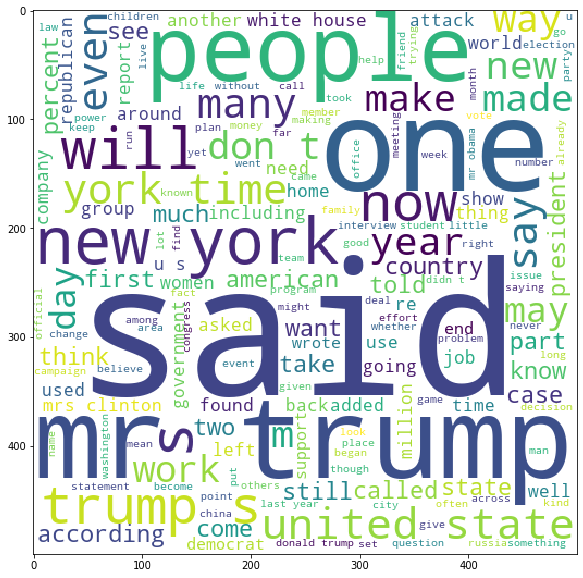

In [19]:
wordcloud=WordCloud(width=500,height=500,
                   background_color='white',
                   stopwords=stopwords,
                   min_font_size=10).generate(real_news)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis=("off")

plt.show()

# WORDCLOUD FOR FAKE NEWS

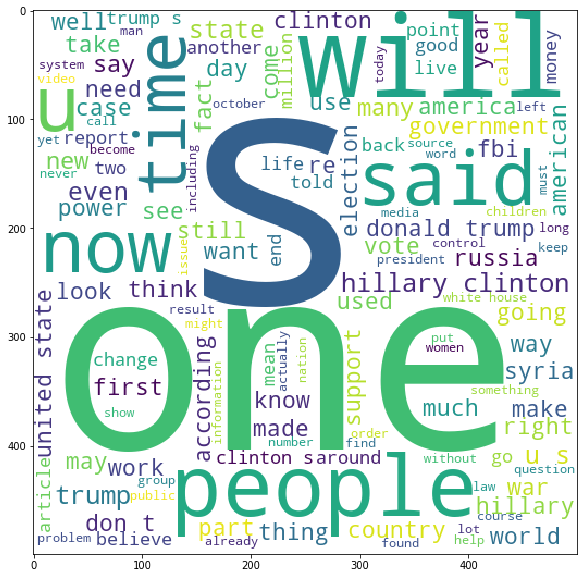

In [20]:
wordcloud=WordCloud(width=500,height=500,
                   background_color='white',
                   stopwords=stopwords,
                   min_font_size=10).generate(fake_news)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis=("off")

plt.show()

# LEMMATIZATION AND STOPWORDS

In [21]:
from nltk.stem import WordNetLemmatizer

In [22]:
lemma=WordNetLemmatizer()
for index,row in df.iterrows():
    cleaned_text= ''
    
    #Here , we have used the re function to remove punctuations and spaces then , then converted the words into tokens. 
    
    sentence=row['Combined']
    sentence=re.sub(r'[^\w\s]','',sentence)
    
    #stopwords helps us remove  words that occur too frequently and not considered informative or relevant 
    
    words=nltk.word_tokenize(sentence)
    words= [w for w in words if not w in stopwords]
    
    for word in words:
        cleaned_text=cleaned_text +' ' +str(lemma.lemmatize(word)).lower()
    df.loc[index,'Combined']=cleaned_text
        

In [23]:
df=df[['Combined','label']]

In [24]:
df

,Combined,label
0,ethics questions dogged agriculture nominee g...,0
1,us must dig deep stop argentinas lionel messi...,0
2,cotton house do not walk plank vote bill can ...,0
3,paul lepage besieged maine governor sends con...,0
4,a digital 911 if trump wins finian cunningham...,1
...,...,...
20794,one police shift patrolling anxious america t...,0
20796,albert pike european migrant crisis rixon ste...,1
20797,dakota access caught infiltrating protests in...,1
20798,how stretch summer solstice the new york time...,0


In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# SPLIT THE DATA

In [26]:
X=df['Combined']
Y=df['label']

# COUNTVECTORIZER(BAG OF WORDS) AND TFIDF TRANSFORMER


In [27]:
#Here I have used both count vectarizer and tfidf vectorizer to further refine the output of count vectorizer. I felt that bag of words just gives weigtht to words based on the frequency which might not be the right approach or measure of the importance of that particular word

cv=CountVectorizer()
cv.fit_transform(X)

freq_term_matrix=cv.transform(X)

tfidf=TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix=tfidf.fit_transform(freq_term_matrix)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(tf_idf_matrix,Y, random_state=0)

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
print(X_train.shape,y_train.shape)

(13713, 195359) (13713,)


In [32]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_train,y_train)
predlr=LR.predict(X_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9623797025371829
[[2512   77]
 [  95 1888]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2589
           1       0.96      0.95      0.96      1983

    accuracy                           0.96      4572
   macro avg       0.96      0.96      0.96      4572
weighted avg       0.96      0.96      0.96      4572



In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
NB=MultinomialNB()
NB.fit(X_train,y_train)
NB.score(X_train,y_train)
predNB=NB.predict(X_test)
print(accuracy_score(y_test,predNB))
print(confusion_matrix(y_test,predNB))
print(classification_report(y_test,predNB))

0.7362204724409449
[[2588    1]
 [1205  778]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      2589
           1       1.00      0.39      0.56      1983

    accuracy                           0.74      4572
   macro avg       0.84      0.70      0.69      4572
weighted avg       0.82      0.74      0.70      4572



In [35]:
from sklearn.svm import SVC

In [36]:
SV=SVC()
SV.fit(X_train,y_train)
SV.score(X_train,y_train)
predsv=SV.predict(X_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.9746281714785652
[[2534   55]
 [  61 1922]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2589
           1       0.97      0.97      0.97      1983

    accuracy                           0.97      4572
   macro avg       0.97      0.97      0.97      4572
weighted avg       0.97      0.97      0.97      4572



In [37]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT.score(X_train,y_train)
preddt=DT.predict(X_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9599737532808399
[[2495   94]
 [  89 1894]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2589
           1       0.95      0.96      0.95      1983

    accuracy                           0.96      4572
   macro avg       0.96      0.96      0.96      4572
weighted avg       0.96      0.96      0.96      4572

